# Approximation for pi using the Monte Carlo integration method

literature: https://en.wikipedia.org/wiki/Monte_Carlo_method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sqrt

## How does Monte Carlo integration work?

given: 
- function f(x) to be integrated (higher dimensions optional)
- integration borders as interval [a;b]

method:
- define a rectangle or square around the graph using a and b as left and right border
- create a set of random points in this rectangle or square
- count points under the graph and above the graph
- compute probability for a point ending up under the graph
- compare probability with total surface of rectangle $\rightarrow $ that is the integral

#### Illustration

In [2]:
def circle_func(x):
    
    '''calculates f(x)

    Parameters
    ----------
    x : number or array-like
        x coordinate(s)

    Returns
    -------
    number or array-like
        y coordinate(s)
    '''
    
    y = sqrt( r**2 - x**2 )
    return y

In [3]:
r = 1
x1 = np.linspace( 0, r, 100 )
f1 = circle_func(x1)

In [4]:
import random

def rand_points_square(n,a,b):
    
    '''gives random points in 2D

    Parameters
    ----------
    n : number
        amount of points
    a , b : numbers
        Interval of integration [a,b]

    Returns
    -------
    2 arrays of 1D
        x and y coordinates of random points
    '''
    

    random.seed()
    list_x = list()
    list_y = list()
    for i in range(0,n):
        x = random.random() * b
        y = random.random() * b
        list_x.append(x)
        list_y.append(y)
    points_x = np.asarray(list_x)
    points_y = np.asarray(list_y)
    return points_x, points_y

In [5]:
a = 0
b = r
n = 1000
points_x, points_y = rand_points_square(n,a,b)

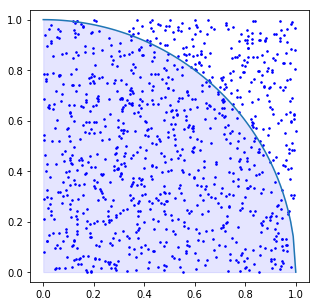

In [6]:
plt.figure(figsize = (5,5))
plt.plot(x1,f1)
plt.scatter(points_x, points_y, s = 10, color = 'blue', marker = ".")
plt.xlim(0,r)
plt.ylim(0,r)
plt.axis('equal')
plt.fill_between(x1, f1, color="b", alpha=.1)
plt.show()

nexts things to do:
- find out, which point belongs to surface under graph, which does not and count one of them 
- calculate surface

### Count points located on surface

In [7]:
def counts_under_graph(x,y,func):
    
    '''counts points under graph

    Parameters
    ----------
    x, y : array-like
        coordinates of points
    func : string
        the function to be considered

    Returns
    -------
    integer
        number of points under graph
    '''

    counts_true = 0

    for i in range(0, len(x)-1):
        y2 = func(x[i])
        distance = y2 - y[i]
        if distance >= 0:
            counts_true += 1
        else:
            counts_true = counts_true
    return counts_true

In [8]:
counts = counts_under_graph(points_x, points_y, circle_func)
print(counts)

773


### Calculate approximation for surface

$ \dfrac{surface}{entire} = \dfrac{counts}{n} \Leftrightarrow  surface = \dfrac{entire\cdot counts}{n}$

In [9]:
entire = b**2

surface = (entire*counts)/n
print(surface)

0.773


## We have the surface - now the approximation for pi!

$ surface\: of\: circle: \qquad A = \pi \cdot r^2 \Leftrightarrow \pi = \dfrac{A}{r^2} $ <br>
We have a circle's fourth, so ... <br>
$ \pi = \dfrac{4\cdot surface}{r^2} $ 

In [10]:
pi_approx = (4*surface)/(r**2)
difference = abs(np.pi - pi_approx)

print("Approximation: pi = ", pi_approx)
print("Error: ", difference)

Approximation: pi =  3.092
Error:  0.049592653589793034


To make things easier, we pack the entire process into one final function.

In [11]:
def approx_pi(n,a,b,r):
    
    '''approximation for pi using the functions above

    Parameters
    ----------
    n : integer
        number of random points
    a,b : numbers
        limits of integration interval
    r : number
        the circle's radius

    Returns
    -------
    float, float
        approximation of pi, It's error
    '''

    points_x, points_y = rand_points_square(n,a,b)
    counts = counts_under_graph(points_x, points_y, circle_func)
    surface = (entire*counts)/n
    pi_approx = (4*surface)/(r**2)
    difference = abs(np.pi - pi_approx)
    return pi_approx, difference

And now repeat the experiment with higher n! You will see, the error reduces.

In [13]:
n = 100000

pi_approx, difference = approx_pi(n,a,b,r)

print("Approximation: pi = ", pi_approx)
print("Error: ", difference)

Approximation: pi =  3.14788
Error:  0.006287346410206673


## Behaviour of the error

In [29]:
n_array = np.linspace(20, 10000, 20)
diff_list = list()
n_list = list()

for i in range(0, len(n_array)-1):
    nvar = int(n_array[i])
    pi_approx, diff = approx_pi(nvar,a,b,r)
    n_list.append(nvar)
    diff_list.append(diff)

n_array = np.asarray(n_list)
diff_array = np.asarray(diff_list)

#print(n_array)
#print(diff_array)

[  20  545 1070 1595 2121 2646 3171 3696 4222 4747 5272 5797 6323 6848
 7373 7898 8424 8949 9474]
[0.25840735 0.0076477  0.00888237 0.07701585 0.0241952  0.03301052
 0.02460098 0.02074501 0.03983795 0.00144505 0.00939369 0.00348239
 0.0386352  0.01951321 0.0082785  0.01219281 0.00085749 0.01138533
 0.022013  ]


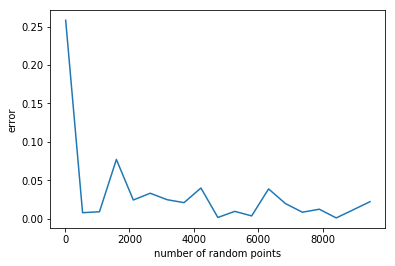

In [32]:
plt.figure()
plt.plot(n_array, diff_array)
plt.xlabel("number of random points")
plt.ylabel("error")
plt.show()